In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df_og= pd.read_csv('delivery_time.csv')
df_og

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data visualization

In [3]:
df= df_og.copy()

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
df.rename({'Delivery Time':'DT',
          'Sorting Time':'ST'},inplace=True,axis=1)
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
df.shape

(21, 2)

In [8]:
print(df['DT'].kurt())
print(df['ST'].kurt())

0.31795982942685397
-1.14845514534878


In [9]:
print(df['DT'].skew())
print(df['ST'].skew())

0.3523900822831107
0.047115474210530174


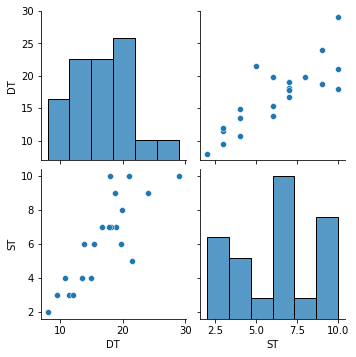

In [10]:
sns.pairplot(df)

<AxesSubplot:>

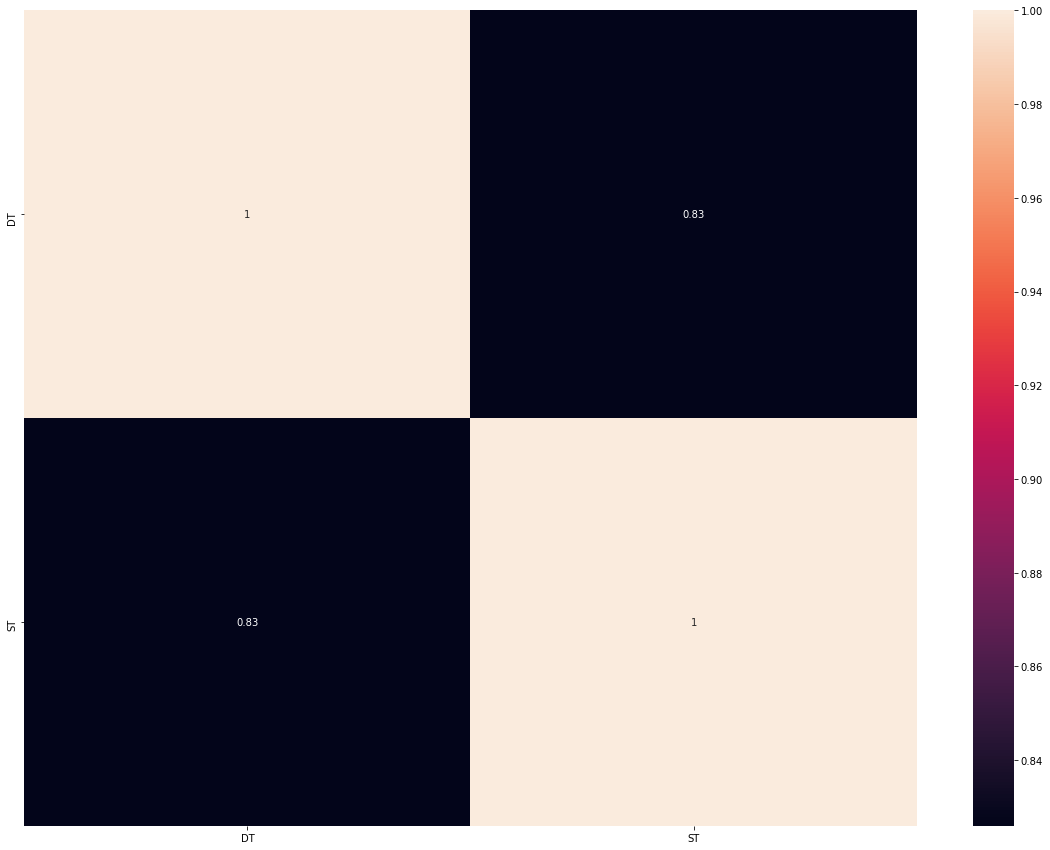

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

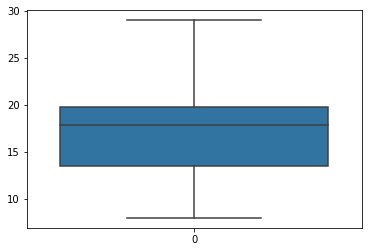

In [12]:
sns.boxplot(data=df['DT'])

<AxesSubplot:>

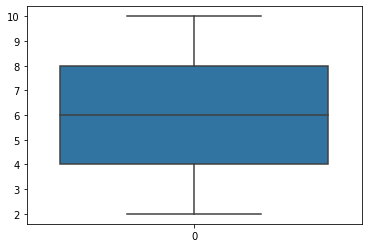

In [13]:
sns.boxplot(data=df['ST'])

In [14]:
#counting duplicate rows
df[df.duplicated()].shape

(0, 2)

<AxesSubplot:>

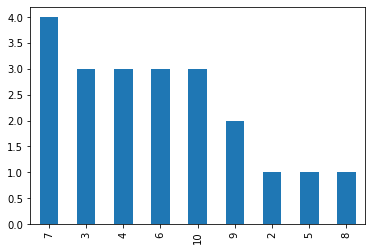

In [15]:
df['ST'].value_counts().plot.bar()

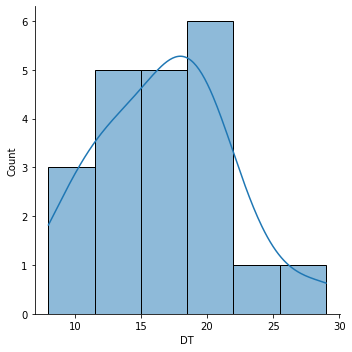

In [16]:
sns.displot(df['DT'],kde=True)

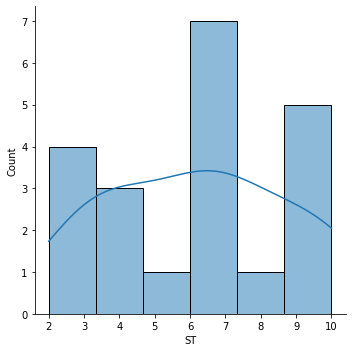

In [17]:
sns.displot(df['ST'],kde=True)

In [18]:
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
model = smf.ols("DT~ST",data=df).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

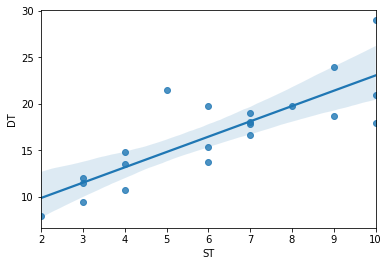

In [20]:
sns.regplot(x='ST', y='DT', data=df)

In [21]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [22]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [23]:
#R suared values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        20:04:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying Transformations

##### Power Transformation

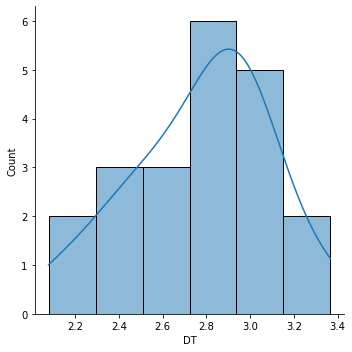

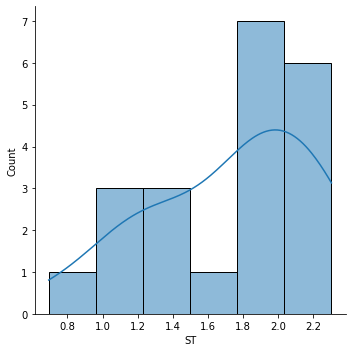

In [25]:
df_pr = df
df_pr['DT']= np.log(df_pr['DT'])
df_pr['ST']= np.log(df_pr['ST'])
sns.displot(df_pr['DT'],kde=True)
sns.displot(df_pr['ST'],kde=True)

In [26]:
model_pr= smf.ols('ST~DT',data=df_pr).fit()

In [27]:
model_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.60e-07
Time:                        20:04:41   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
DT             1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### SquareRoot Transformation

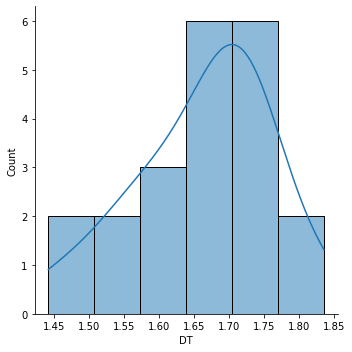

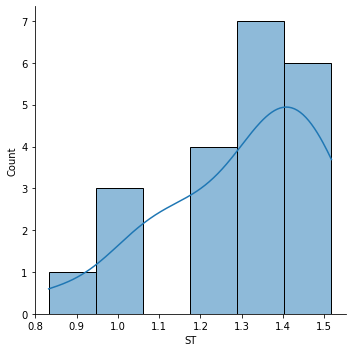

In [28]:
df_sqrt= df

df_sqrt['DT']=np.sqrt(df_sqrt['DT'])
df_sqrt['ST']=np.sqrt(df_sqrt['ST'])
sns.displot(df_sqrt['DT'],kde=True)
sns.displot(df_sqrt['ST'],kde=True)

In [29]:
model_sqrt=smf.ols('ST~DT', data=df_sqrt).fit()

In [30]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     71.53
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           7.27e-08
Time:                        20:04:42   Log-Likelihood:                 21.956
No. Observations:                  21   AIC:                            -39.91
Df Residuals:                      19   BIC:                            -37.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5939      0.343     -4.648      0.000      -2.312      -0.876
DT             1.7410      0.206      8.457      0.000       1.310       2.172
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.612
Skew:                          -0.220   Prob(JB):                        0.736
Kurtosis:                       2.289   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Square Transformation

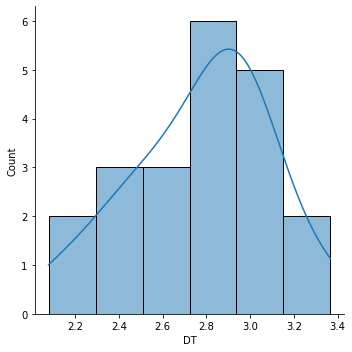

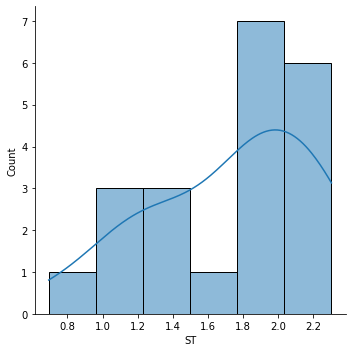

In [31]:
df_sq =df
df_sq['DT']=np.square(df_sq['DT'])
df_sq['ST']= np.square(df_sq['ST'])

sns.displot(df_sq['DT'],kde=True)
sns.displot(df_sq['ST'],kde=True)

In [32]:
model_sq=smf.ols('ST~DT',data=df_sq).fit()

In [33]:
model_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.60e-07
Time:                        20:04:43   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
DT             1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Log Transformation

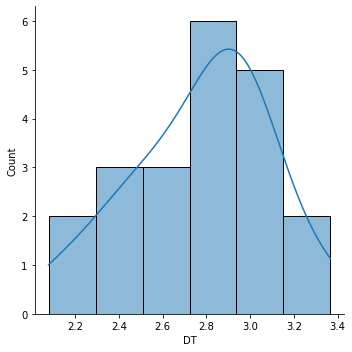

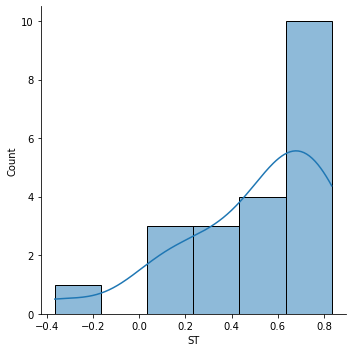

In [34]:
df_lg = df
df_lg['ST'] = np.log(df_lg['ST'])
sns.displot(df_lg['DT'],kde=True)
sns.displot(df_lg['ST'],kde=True)

In [35]:
model_lg= smf.ols('ST~DT',data=df_lg).fit()

In [36]:
model_lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     65.22
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.46e-07
Time:                        20:04:43   Log-Likelihood:                 10.423
No. Observations:                  21   AIC:                            -16.85
Df Residuals:                      19   BIC:                            -14.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9341      0.304     -6.366      0.000      -2.570      -1.298
DT             0.8788      0.109      8.076      0.000       0.651       1.107
==============================================================================
Omnibus:                        1.370   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.054
Skew:                          -0.308   Prob(JB):                        0.590
Kurtosis:                       2.091   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""